In [1]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


In [4]:
# LOADING DATASET
df =  pd.read_csv("fashionlink_dataset.csv")
print(df.head)


<bound method NDFrame.head of      order_id  client_id  measurement_id  artisan_id garment_type fabric_type  \
0           1         79             155          40         Suit        Wool   
1           2        224             440          91       Kaftan       Linen   
2           3        263             524           4        Dress        Wool   
3           4        262             523          60         Suit      Ankara   
4           5        300             600          77       Kaftan        Wool   
..        ...        ...             ...         ...          ...         ...   
995       996        217             430          85        Shirt        Silk   
996       997        224             440         111        Dress       Linen   
997       998         15              29          42       Agbada        Wool   
998       999        244             479          51        Dress        Wool   
999      1000        173             333          12         Suit        Silk  

In [5]:
print (df.columns)
df. shape

Index(['order_id', 'client_id', 'measurement_id', 'artisan_id', 'garment_type',
       'fabric_type', 'order_complexity_score', 'order_status', 'order_date',
       'delivery_date', 'delivery_days', 'delivered_on_time', 'client_age',
       'client_location', 'client_gender', 'chest_cm', 'waist_cm', 'hip_cm',
       'shoulder_cm', 'arm_length_cm', 'inseam_cm', 'recorded_at',
       'artisan_location', 'years_experience', 'average_rating', 'specialty'],
      dtype='object')


(1000, 26)

In [6]:
df["location_match"] = np.where(
    df["client_location"] == df["artisan_location"],
    1,
    0
)

In [7]:
X = df[[
    "average_rating",
    "years_experience",
    "order_complexity_score",
    "location_match"
]]

y = df["delivered_on_time"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

train_df = df.loc[X_train.index].copy()

artisan_success = train_df.groupby("artisan_id")["delivered_on_time"].mean()

X_train["artisan_success_rate"] = train_df["artisan_id"].map(artisan_success)

X_test["artisan_success_rate"] = df.loc[X_test.index, "artisan_id"].map(artisan_success)

global_avg = y_train.mean()

X_test["artisan_success_rate"].fillna(global_avg, inplace=True)

/tmp/ipython-input-3630450382.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test["artisan_success_rate"].fillna(global_avg, inplace=True)


Class distribution for delivered_on time:
 delivered_on_time
1    645
0    355
Name: count, dtype: int64


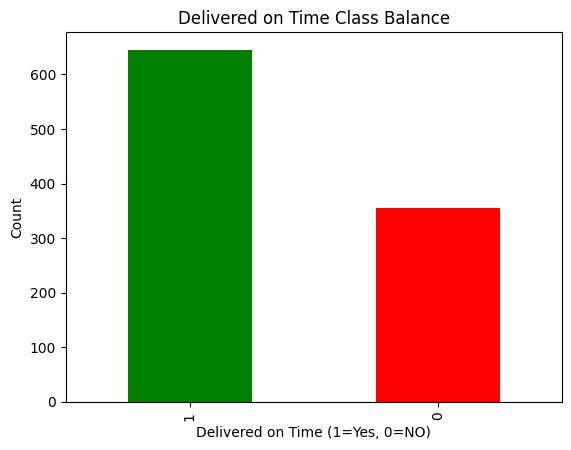

In [10]:
# Order completion prediction
print("Class distribution for delivered_on time:\n", df['delivered_on_time'].value_counts())

# visualizing
df['delivered_on_time'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Delivered on Time Class Balance')
plt.xlabel('Delivered on Time (1=Yes, 0=NO)')
plt.ylabel('Count')
plt.show()

In [9]:
# Correctly extract features (X) and target (y) from the DataFrame df
X = df.drop('delivered_on_time', axis=1)
y = df['delivered_on_time']

# If a separate DataFrame object named df2 is desired, create a copy of df.
# Note that df2.data and df2.target are not standard attributes for a pandas DataFrame.
df2 = df.copy()

In [11]:
# SPLTING DATASET USING TRAIN_TEST
X = df2.drop('delivered_on_time', axis=1)
y = df2['delivered_on_time']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
y_train.shape[0]== X_train.shape[0]

True

In [12]:
# check numeric features
num_features = ['average_rating', 'years_experience', 'order_complexity_score', 'delivery_days']
print(df[num_features].describe())

#categorical features
cat_features = ['client_location', 'artisan_location', 'garment_type']
for feature in cat_features:
    print(df[feature].value_counts())

       average_rating  years_experience  order_complexity_score  delivery_days
count     1000.000000       1000.000000              1000.00000      1000.0000
mean         4.344280         10.226000                 3.03107        11.7470
std          0.448843          5.256287                 1.17599         5.6136
min          3.510000          1.000000                 1.00000         3.0000
25%          3.945000          6.000000                 2.02000         7.0000
50%          4.435000         11.000000                 3.01500        11.0000
75%          4.740000         15.000000                 4.06000        17.0000
max          5.000000         19.000000                 5.00000        21.0000
client_location
Lagos            217
Port Harcourt    213
Abuja            198
Ibadan           189
Kano             183
Name: count, dtype: int64
artisan_location
Abuja            238
Kano             227
Lagos            225
Port Harcourt    175
Ibadan           135
Name: count, dtype: 

In [13]:
# initialize logistic regression

# Correctly extract features (X) and target (y) from the DataFrame df for this model
X = df.drop('delivered_on_time', axis=1)
y = df['delivered_on_time']

# Re-split the data to ensure X_train and X_test contain all necessary columns
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical columns for one-hot encoding
cat_cols = ['garment_type', 'fabric_type', 'order_status', 'client_location', 'client_gender', 'artisan_location', 'specialty']

# Identify date columns to drop
date_cols = ['order_date', 'delivery_date', 'recorded_at']

# Drop date columns from X_train and X_test
X_train_processed = X_train.drop(columns=date_cols)
X_test_processed = X_test.drop(columns=date_cols)

# Apply one-hot encoding to X_train and X_test (using the processed dataframes)
X_train_encoded = pd.get_dummies(X_train_processed, columns=cat_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_processed, columns=cat_cols, drop_first=True)

# Align columns - this is crucial after one-hot encoding when using train/test split
# The columns might not be identical if some categories are only present in train or test set
train_cols = X_train_encoded.columns
test_cols = X_test_encoded.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_encoded[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_encoded[c] = 0

X_test_encoded = X_test_encoded[train_cols] # Ensure the order of columns is the same

df3 = LogisticRegression(max_iter=200, multi_class="ovr")
df3.fit(X_train_encoded, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, multi_class='ovr')

In [20]:
# Features for modeling (including engineered)
features_recommend = [
    'average_rating',
    'years_experience',
    'order_complexity_score',
    'rating_experience_score',
    'experience_complexity_ratio'
]

# Calculate engineered features before using them for X
df['rating_experience_score'] = df['average_rating'] * df['years_experience']
df['experience_complexity_ratio'] = df['years_experience'] / (df['order_complexity_score'] + 1)

X = df[features_recommend]
y = df['delivered_on_time']

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Metrics
from sklearn.metrics import accuracy_score, classification_report
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature importance
importances = pd.Series(rf_model.feature_importances_, index=features_recommend).sort_values(ascending=False)
print("Feature Importance:\n", importances)

Random Forest Accuracy: 0.605
              precision    recall  f1-score   support

           0       0.44      0.38      0.41        71
           1       0.68      0.73      0.70       129

    accuracy                           0.60       200
   macro avg       0.56      0.55      0.56       200
weighted avg       0.59      0.60      0.60       200

Feature Importance:
 order_complexity_score         0.314596
experience_complexity_ratio    0.312719
average_rating                 0.157507
rating_experience_score        0.147790
years_experience               0.067389
dtype: float64


In [21]:
#Example feature selection Artisan reccommendation

features_recommend = [
    'average_rating',
    'years_experience',
    'order_complexity_score'
]
X_rec = df[features_recommend]
y_rec = df['delivered_on_time']

# Train/test split
# Using different variable names (X_train_rec, y_train_rec, etc.) to avoid conflicts
# with previous train/test splits in other cells if they were to be run sequentially.
X_train_rec, X_test_rec, y_train_rec, y_test_rec = train_test_split(X_rec, y_rec, test_size=0.2, random_state=42, stratify=y_rec)

# Random Forest
rf_recommend = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)
rf_recommend.fit(X_train_rec, y_train_rec)
y_pred_rec = rf_recommend.predict(X_test_rec)

print("Artisan Recommendation Accuracy (based on delivered_on_time):", accuracy_score(y_test_rec, y_pred_rec))

Artisan Recommendation Accuracy (based on delivered_on_time): 0.625


In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test_rec, y_pred_rec))

              precision    recall  f1-score   support

           0       0.47      0.41      0.44        71
           1       0.70      0.74      0.72       129

    accuracy                           0.62       200
   macro avg       0.58      0.58      0.58       200
weighted avg       0.61      0.62      0.62       200



In [23]:
print(df[['delivery_days', 'delivered_on_time']].head(20))

    delivery_days  delivered_on_time
0               3                  1
1              14                  1
2               8                  1
3              10                  1
4              15                  0
5               5                  1
6              16                  0
7              19                  0
8              16                  0
9              16                  0
10             16                  0
11             15                  0
12              3                  1
13             21                  0
14             12                  1
15             21                  0
16              8                  1
17             12                  1
18             10                  1
19              8                  1


In [25]:

measurement_features = ['arm_length_cm', 'chest_cm', 'hip_cm', 'inseam_cm', 'shoulder_cm', 'waist_cm']

scaler = StandardScaler()
scaled_measurements = scaler.fit_transform(df[measurement_features])


isolation_model = IsolationForest(
    contamination=0.05,
    random_state=42
)

isolation_model.fit(scaled_measurements)

IsolationForest(contamination=0.05, random_state=42)

In [27]:
df['measurement_anomaly'] = isolation_model.predict(scaled_measurements)

In [28]:
df['measurement_anomaly'].value_counts()


,count
measurement_anomaly,
1,951
-1,49


In [29]:
anomalies = df[df['measurement_anomaly'] == -1]
print(anomalies.head(5))

    order_id  client_id  measurement_id  artisan_id garment_type fabric_type  \
12        13        200             394          90         Suit       Linen   
18        19        175             338          23       Kaftan        Silk   
28        29         13              25           6        Shirt      Ankara   
47        48         47              92           6         Suit       Linen   
87        88        295             589          91         Suit      Cotton   

    order_complexity_score order_status                  order_date  \
12                    4.05    Completed  2025-09-22 06:40:38.415712   
18                    3.74  In Progress  2025-05-12 06:40:38.418509   
28                    1.20  In Progress  2025-12-06 06:40:38.422929   
47                    3.74  In Progress  2025-08-08 06:40:38.435847   
87                    3.11    Completed  2025-02-24 06:40:38.453288   

                 delivery_date  ...  inseam_cm                 recorded_at  \
12  2025-09-25

In [42]:
df['order_date'] = pd.to_datetime(df['order_date'])
df= df.sort_values(['client_id', 'order_date'])

client_orders = df.groupby('client_id').size().reset_index(name='total_orders')

client_avg_rating = df.groupby('client_id')['average_rating'].mean().reset_index(name='avg_rating')

df['days_since_last_order'] = df.groupby('client_id')['order_date'].diff().dt.days

client_avg_days_since_last_order = df.groupby('client_id')['days_since_last_order'].mean().reset_index(name='avg_days_since_last_order')

df['order_date'] = pd.to_datetime(df['order_date'])
df = df.sort_values(['client_id', 'order_date'])
# trial
#Create cutoff date (last 60 days as prediction window)
cutoff_date = df['order_date'].max() - pd.Timedelta(days=60)

# 2️⃣ Split into past and future
past_df = df[df['order_date'] <= cutoff_date].copy()
future_df = df[df['order_date'] > cutoff_date].copy()
past_df['days_since_last_order'] = (
    past_df.groupby('client_id')['order_date']
    .diff()
    .dt.days
)

# 3️⃣ Create features ONLY from past data
client_orders = past_df.groupby('client_id').size().reset_index(name='total_orders')

client_avg_rating = past_df.groupby('client_id')['average_rating'].mean().reset_index(name='avg_rating')

past_df['days_since_last_order'] = past_df.groupby('client_id')['order_date'].diff().dt.days
client_avg_days = past_df.groupby('client_id')['days_since_last_order'].mean().reset_index(name='avg_days_since_last_order')

client_df = client_orders.merge(client_avg_rating, on='client_id', how='left')
client_df = client_df.merge(client_avg_days, on='client_id', how='left')

# 4️⃣ Create target from FUTURE data
future_orders = future_df.groupby('client_id').size().reset_index(name='future_orders')
future_orders['will_reorder'] = 1

client_df = client_df.merge(
    future_orders[['client_id', 'will_reorder']],
    on='client_id',
    how='left'
)

client_df['will_reorder'] = client_df['will_reorder'].fillna(0)

#Define features and target
features_retention = ['total_orders', 'avg_rating', 'avg_days_since_last_order']
X = client_df[features_retention]
y = client_df['will_reorder']

# 6️⃣ Train-test split

x_train_ret, x_test_ret, y_train_ret, y_test_ret = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 7️⃣ Train model

rf_retention = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

rf_retention.fit(x_train_ret, y_train_ret)

# 8️⃣ Predict
y_pred_ret = rf_retention.predict(x_test_ret)

# 9️⃣ Print accuracy
from sklearn.metrics import accuracy_score

print("Client Retention Accuracy:", accuracy_score(y_test_ret, y_pred_ret))

Client Retention Accuracy: 0.5535714285714286
